In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load & Explore Dataset

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")

- Check what's in the data

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


- Check data types, missing values, shape

In [6]:
display("DataTypes:", df.dtypes)
print("Total Null Counts:\n", df.isna().sum())
print("\n\nShape:", df.shape)
display(df.head())

'DataTypes:'

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

Total Null Counts:
 area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


Shape: (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


- Droping unnecessary features

In [7]:
df = df.drop(columns=["society", "location"])

- Converting Size -> Object to Numeric

In [8]:
def convert_size_to_int(size):
    if isinstance(size, str):
        parts = size.split(' ')
        if len(parts) > 1 and parts[0].isdigit():
            return int(parts[0])
    return None

df['size'] = df['size'].apply(convert_size_to_int)
df['size'] = df['size'].fillna(df['size'].median())


def convert_sqft_to_num(x):
    try:
        float(x)
        return float(x)
    except:
        if isinstance(x, str):
            tokens = x.split('-')
            if len(tokens) == 2:
                return (float(tokens[0]) + float(tokens[1])) / 2
    return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].median())

In [9]:
df.isna().sum()

area_type         0
availability      0
size              0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

- Handling Missing Values

In [10]:
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [11]:
display(df.head())
df.isna().sum()

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2.0,1200.0,2.0,1.0,51.00


area_type       0
availability    0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

- Identify numeric and categorical features

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['size', 'total_sqft', 'bath', 'balcony', 'price']
Categorical columns: ['area_type', 'availability']


In [13]:
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2.0,1200.0,2.0,1.0,51.00


- Checking the unique values

In [14]:
df.nunique()

area_type          4
availability      81
size              19
total_sqft      1999
bath              19
balcony            4
price           1994
dtype: int64

- Encode categorical variables

In [15]:
df = pd.get_dummies(df, columns=['area_type', 'balcony'], dtype=int)
display(df.head())

,availability,size,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,balcony_0.0,balcony_1.0,balcony_2.0,balcony_3.0
0,19-Dec,2.0,1056.0,2.0,39.07,0,0,0,1,0,1,0,0
1,Ready To Move,4.0,2600.0,5.0,120.00,0,0,1,0,0,0,0,1
2,Ready To Move,3.0,1440.0,2.0,62.00,1,0,0,0,0,0,0,1
3,Ready To Move,3.0,1521.0,3.0,95.00,0,0,0,1,0,1,0,0
4,Ready To Move,2.0,1200.0,2.0,51.00,0,0,0,1,0,1,0,0


### Visualization

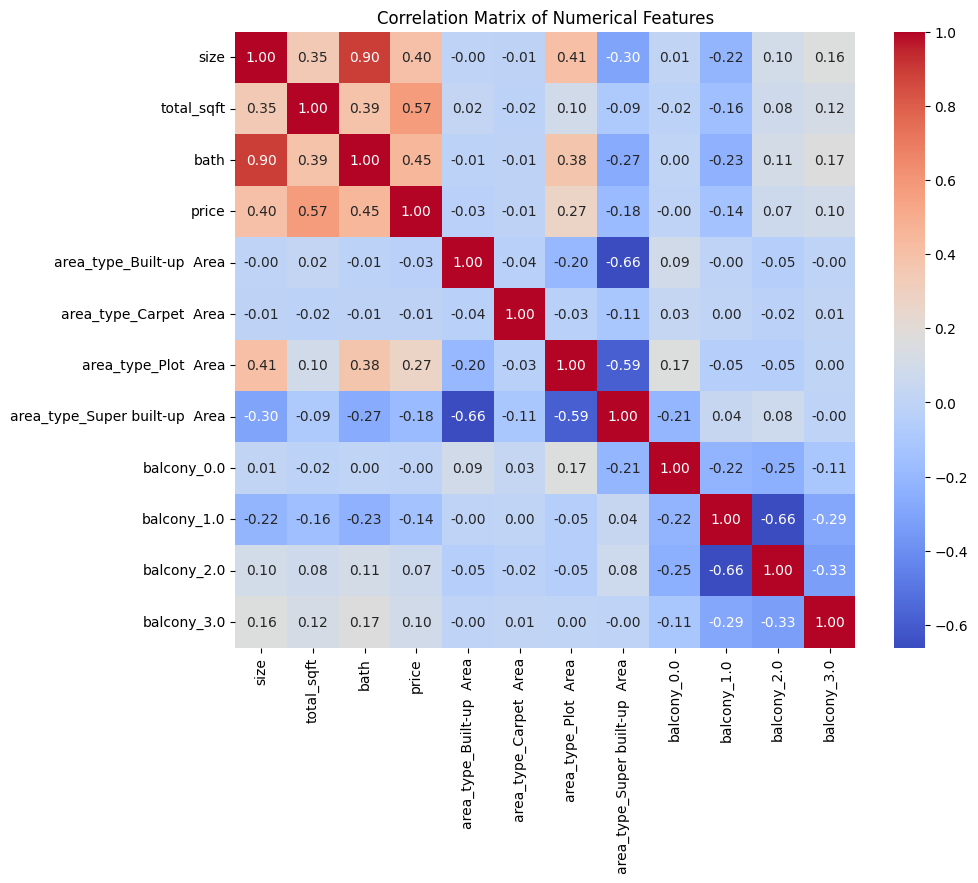

In [16]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

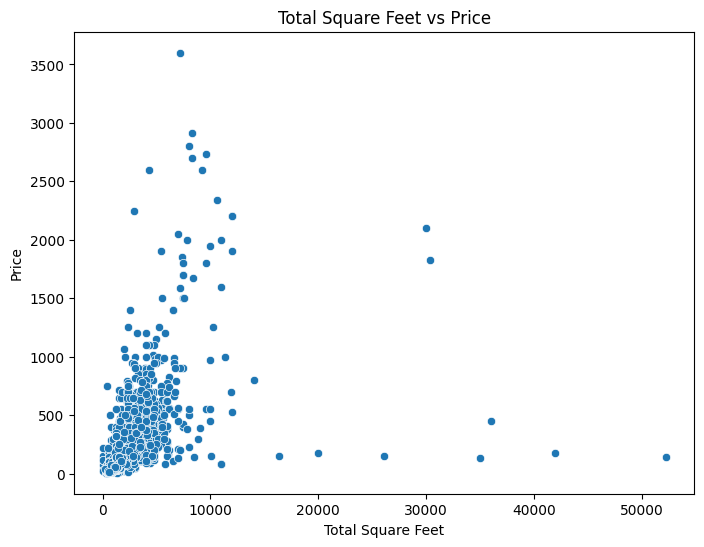

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title('Total Square Feet vs Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

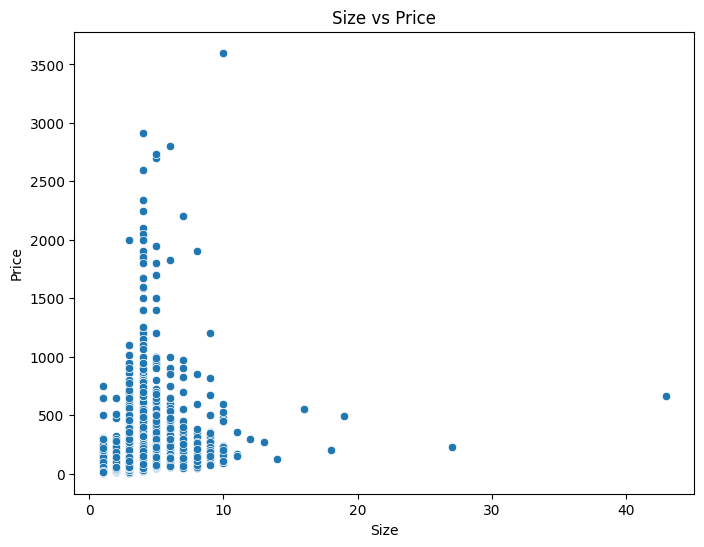

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='size', y='price')
plt.title('Size vs Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

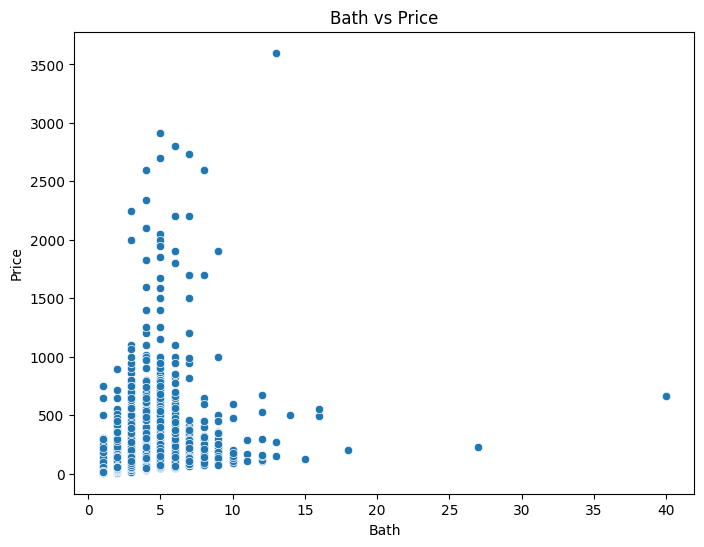

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bath', y='price')
plt.title('Bath vs Price')
plt.xlabel('Bath')
plt.ylabel('Price')
plt.show()

In [20]:
df.rename(columns={
    'area_type_Built-up Area': 'Built_up_Area',
    'area_type_Carpet Area': 'Carpet_Area',
    'area_type_Plot Area': 'Plot_Area',
    'area_type_Super built-up Area': 'Super_built_up_Area'
}, inplace=True)

In [21]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

In [22]:
print(df.columns.tolist())

['availability', 'size', 'total_sqft', 'bath', 'price', 'area_type_Built_up__Area', 'area_type_Carpet__Area', 'area_type_Plot__Area', 'area_type_Super_built_up__Area', 'balcony_0.0', 'balcony_1.0', 'balcony_2.0', 'balcony_3.0']


In [23]:
area_types = ['area_type_Built_up__Area', 'area_type_Carpet__Area', 'area_type_Plot__Area', 'area_type_Super_built_up__Area']

# Function to get area type
def get_area_type(row):
    for area in area_types:
        if row[area] == 1:
            return area.replace('area_type_','')
    return 'Unknown'

# Apply the function to create new column
df['area_type'] = df.apply(get_area_type, axis=1)

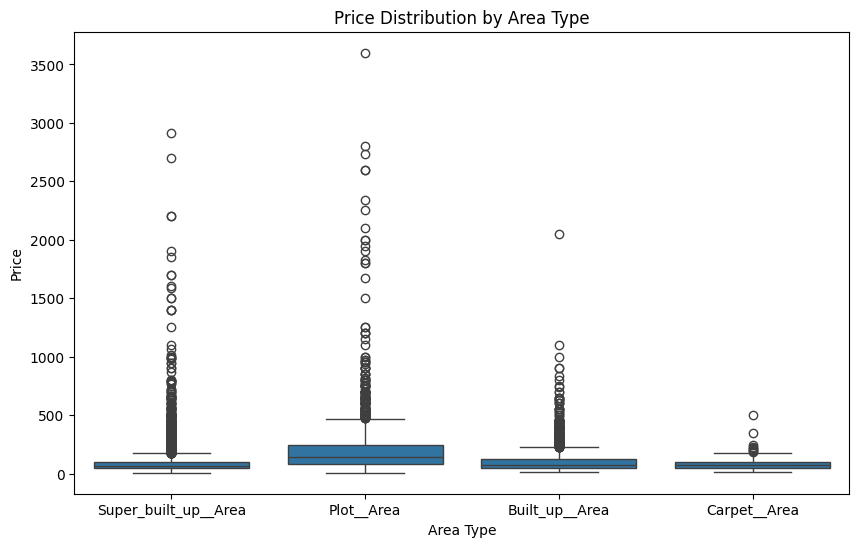

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='area_type', y='price', data=df)
plt.title('Price Distribution by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Price')
plt.show()

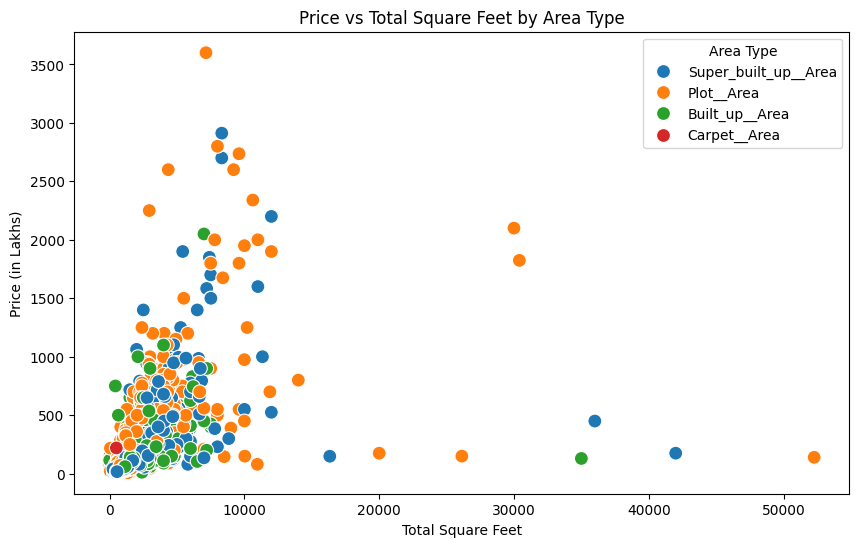

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_sqft', y='price', hue='area_type', data=df, s=100)
plt.title('Price vs Total Square Feet by Area Type')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in Lakhs)')
plt.legend(title='Area Type')
plt.show()

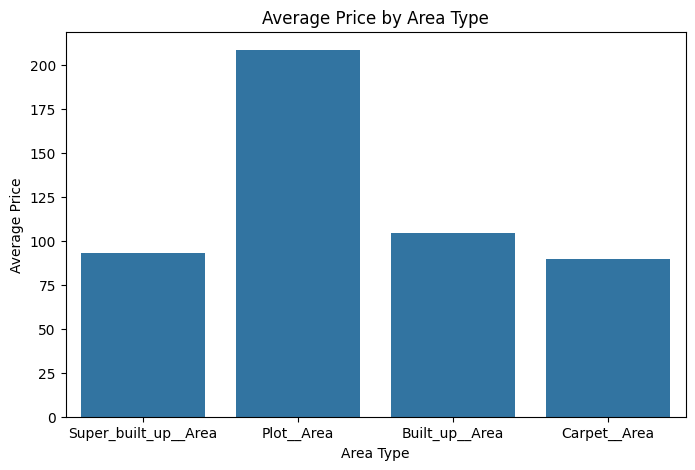

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='area_type', y='price', data=df, ci=None)
plt.title('Average Price by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Average Price')
plt.show()

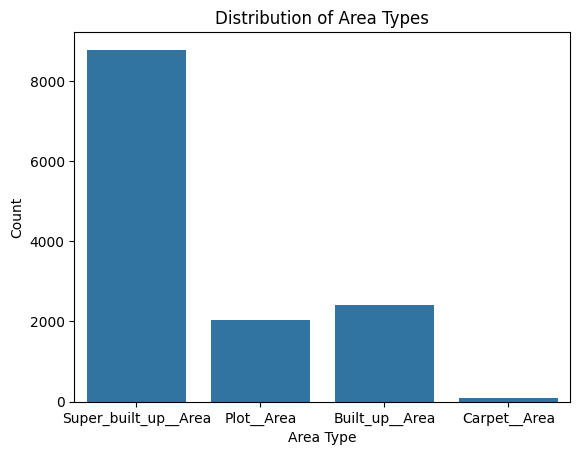

In [27]:
sns.countplot(x='area_type', data=df)
plt.title('Distribution of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()

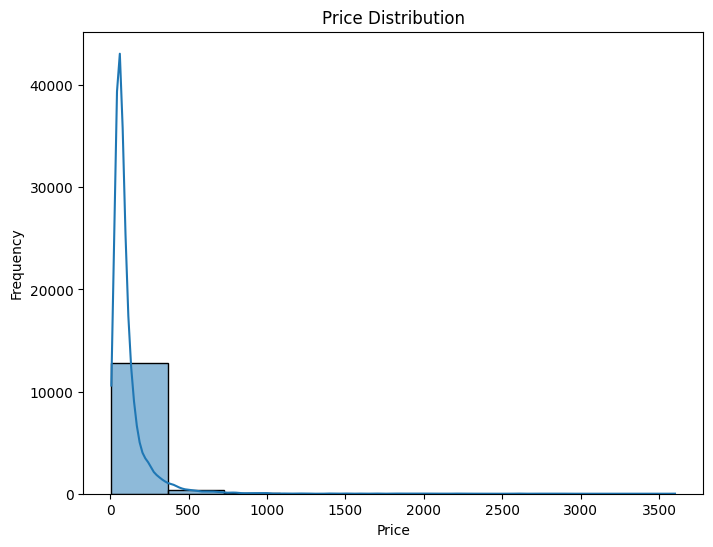

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

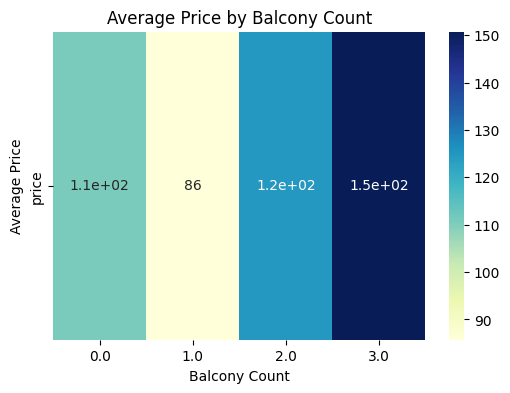

In [29]:
balcony_cols = ['balcony_0.0', 'balcony_1.0', 'balcony_2.0', 'balcony_3.0']
df['balcony_count'] = df[balcony_cols].idxmax(axis=1).str.extract('balcony_(\\d\\.\\d)').astype(float)

# Group by balcony count and get average price
pivot = df.groupby('balcony_count')['price'].mean().reset_index()

# For a heatmap, you need a 2D table; here just plot as a bar heatmap
plt.figure(figsize=(6,4))
sns.heatmap(pivot.set_index('balcony_count').T, annot=True, cmap='YlGnBu')
plt.title('Average Price by Balcony Count')
plt.xlabel('Balcony Count')
plt.ylabel('Average Price')
plt.show()

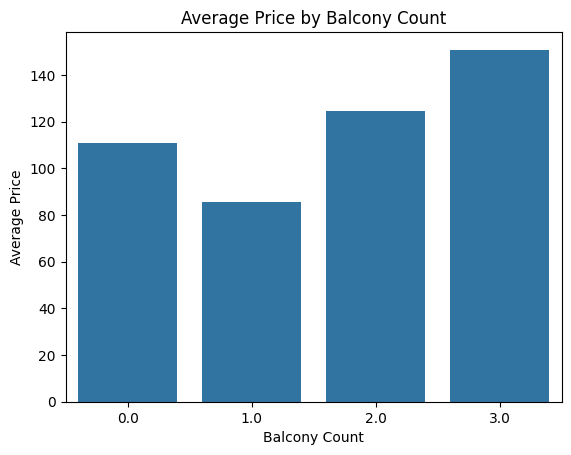

In [30]:
sns.barplot(x='balcony_count', y='price', data=pivot)
plt.title('Average Price by Balcony Count')
plt.xlabel('Balcony Count')
plt.ylabel('Average Price')
plt.show()


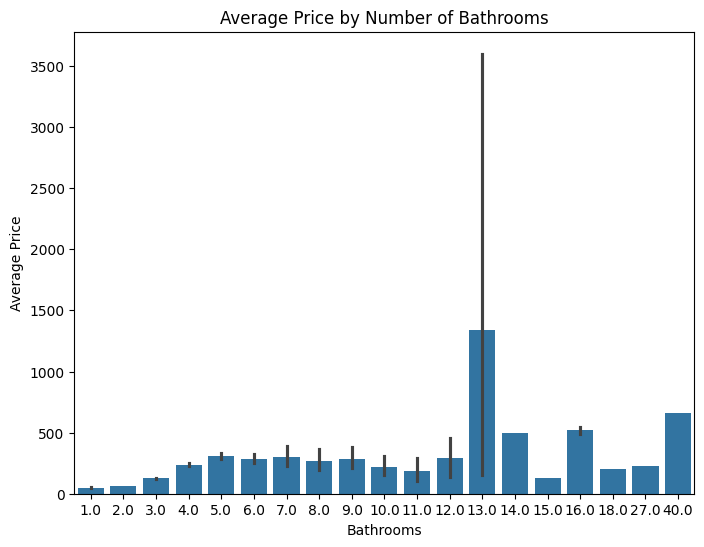

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x='bath', y='price', data=df, estimator='mean')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Average Price')
plt.show()

In [32]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df['bath_per_size'] = df['bath'] / df['size']

In [33]:
display(df.head())

,availability,size,total_sqft,bath,price,area_type_Built_up__Area,area_type_Carpet__Area,area_type_Plot__Area,area_type_Super_built_up__Area,balcony_0.0,balcony_1.0,balcony_2.0,balcony_3.0,area_type,balcony_count,price_per_sqft,bath_per_size
0,19-Dec,2.0,1056.0,2.0,39.07,0,0,0,1,0,1,0,0,Super_built_up__Area,1.0,3699.810606,1.000000
1,Ready To Move,4.0,2600.0,5.0,120.00,0,0,1,0,0,0,0,1,Plot__Area,3.0,4615.384615,1.250000
2,Ready To Move,3.0,1440.0,2.0,62.00,1,0,0,0,0,0,0,1,Built_up__Area,3.0,4305.555556,0.666667
3,Ready To Move,3.0,1521.0,3.0,95.00,0,0,0,1,0,1,0,0,Super_built_up__Area,1.0,6245.890861,1.000000
4,Ready To Move,2.0,1200.0,2.0,51.00,0,0,0,1,0,1,0,0,Super_built_up__Area,1.0,4250.000000,1.000000


### Model Training

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price', 'availability'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10656, 15)
Shape of X_test: (2664, 15)
Shape of y_train: (10656,)
Shape of y_test: (2664,)


- Import ML Libraries

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [36]:
X_train = X_train.drop(columns=['area_type'])
X_test = X_test.drop(columns=['area_type'])

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate Linear Regression Model
y_pred_lr = linear_regression_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  MAE: {mae_lr:.2f}")
print(f"  R²: {r2_lr:.2f}")

# Evaluate Decision Tree Model
y_pred_dt = decision_tree_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Model Performance:")
print(f"  RMSE: {rmse_dt:.2f}")
print(f"  MAE: {mae_dt:.2f}")
print(f"  R²: {r2_dt:.2f}")

# Evaluate Random Forest Model
y_pred_rf = random_forest_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Performance:")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  MAE: {mae_rf:.2f}")
print(f"  R²: {r2_rf:.2f}")

Linear Regression Model Performance:
  RMSE: 100.33
  MAE: 42.48
  R²: 0.53

Decision Tree Model Performance:
  RMSE: 20.57
  MAE: 3.24
  R²: 0.98

Random Forest Model Performance:
  RMSE: 17.75
  MAE: 2.16
  R²: 0.99


In [38]:
print("Model Performance Comparison:")
print("----------------------------------")
print(f"Linear Regression: RMSE = {rmse_lr:.2f}, MAE = {mae_lr:.2f}, R² = {r2_lr:.2f}")
print(f"Decision Tree    : RMSE = {rmse_dt:.2f}, MAE = {mae_dt:.2f}, R² = {r2_dt:.2f}")
print(f"Random Forest    : RMSE = {rmse_rf:.2f}, MAE = {mae_rf:.2f}, R² = {r2_rf:.2f}")

print("\nBest Performing Model:")
if rmse_rf < rmse_dt and rmse_rf < rmse_lr:
    print("Random Forest Model (lowest RMSE and MAE, highest R²)")
elif rmse_dt < rmse_rf and rmse_dt < rmse_lr:
    print("Decision Tree Model (lower RMSE and MAE, higher R² compared to Linear Regression)")
else:
    print("Linear Regression Model (lowest RMSE and MAE, highest R²)")

Model Performance Comparison:
----------------------------------
Linear Regression: RMSE = 100.33, MAE = 42.48, R² = 0.53
Decision Tree    : RMSE = 20.57, MAE = 3.24, R² = 0.98
Random Forest    : RMSE = 17.75, MAE = 2.16, R² = 0.99

Best Performing Model:
Random Forest Model (lowest RMSE and MAE, highest R²)


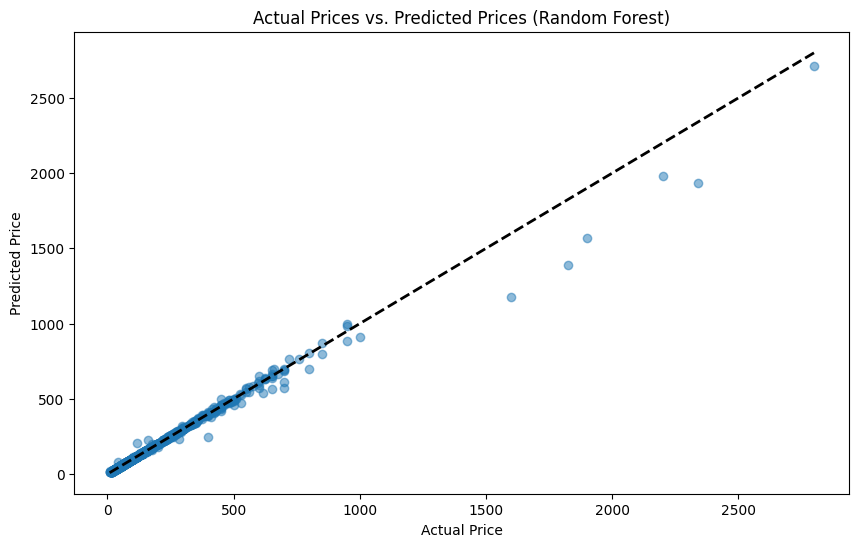

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual Prices vs. Predicted Prices (Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [40]:
y_pred_rf = random_forest_model.predict(X_test)

In [41]:
print("Random Forest Model Performance Summary:")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  MAE: {mae_rf:.2f}")
print(f"  R²: {r2_rf:.2f}")

print("\nBusiness Interpretation:")
print(f"The Random Forest model demonstrates excellent performance in predicting house prices, as indicated by the high R² value of {r2_rf:.2f}. This means that approximately {r2_rf*100:.2f}% of the variance in house prices can be explained by the features used in the model.")
print(f"The RMSE of {rmse_rf:.2f} and MAE of {mae_rf:.2f} suggest that the model's predictions are typically off by around {mae_rf:.2f} Lakhs.  This relatively low error indicates that the model provides accurate price estimations on average.")
print("The scatter plot of actual vs. predicted prices visually confirms this strong performance. The points are tightly clustered around the diagonal line, indicating that the predicted prices are very close to the actual prices for most houses. While the model performs well across the price range, there might be slightly more dispersion for very high or very low priced properties, which is common in regression models.")
print("Overall, the Random Forest model's performance is highly promising for practical business applications such as property valuation, investment analysis, and market trend forecasting due to its high accuracy and low error rates.")

Random Forest Model Performance Summary:
  RMSE: 17.75
  MAE: 2.16
  R²: 0.99

Business Interpretation:
The Random Forest model demonstrates excellent performance in predicting house prices, as indicated by the high R² value of 0.99. This means that approximately 98.52% of the variance in house prices can be explained by the features used in the model.
The RMSE of 17.75 and MAE of 2.16 suggest that the model's predictions are typically off by around 2.16 Lakhs.  This relatively low error indicates that the model provides accurate price estimations on average.
The scatter plot of actual vs. predicted prices visually confirms this strong performance. The points are tightly clustered around the diagonal line, indicating that the predicted prices are very close to the actual prices for most houses. While the model performs well across the price range, there might be slightly more dispersion for very high or very low priced properties, which is common in regression models.
Overall, the Rand

In [42]:
importances = random_forest_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(5)

print("\nTop 5 Features Impacting Price (Random Forest Model):")
display(top_features)


Top 5 Features Impacting Price (Random Forest Model):


,feature,importance
1,total_sqft,0.549474
12,price_per_sqft,0.439262
0,size,0.003326
2,bath,0.002290
13,bath_per_size,0.001646


## Summary:

### Data Analysis Key Findings

*   The Random Forest model achieved a high R² value of 0.99, indicating that it explains approximately 98.52% of the variance in house prices.
*   The model's predictions have a typical error of around 2.16 Lakhs, as indicated by the Mean Absolute Error (MAE).
*   The scatter plot comparing actual and predicted prices shows a strong correlation, with points clustered closely around the diagonal line, suggesting accurate predictions for most properties.
*   The top 5 features influencing house prices according to the Random Forest model are 'total\_sqft', 'price\_per\_sqft', 'size', 'bath', and 'bath\_per\_size'.

### Insights or Next Steps

*   The Random Forest model's strong performance and low error rates make it highly suitable for practical applications such as property valuation and investment analysis.
*   Further investigation into the impact of the top features could provide deeper insights into the key drivers of house prices in the dataset.


In [43]:
import joblib
joblib.dump(random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [44]:
X_train.columns

Index(['size', 'total_sqft', 'bath', 'area_type_Built_up__Area',
       'area_type_Carpet__Area', 'area_type_Plot__Area',
       'area_type_Super_built_up__Area', 'balcony_0.0', 'balcony_1.0',
       'balcony_2.0', 'balcony_3.0', 'balcony_count', 'price_per_sqft',
       'bath_per_size'],
      dtype='object')